First you need to intall neccessary packages, use the command below

In [9]:
import random
from typing import List

In [55]:
class MasterMindAlgorithm:

    def __init__(self, secret_code: List[int]):
        self.guess_code = None
        self.secret_code = secret_code
        self.options = self.get_all_possible_Options(num_bits=len(self.secret_code))

    def get_all_possible_Options(self, num_bits: int, prefix=[], options=[]) -> List[list]:
        if num_bits == 0:
            options.append(prefix)
        else:
            self.get_all_possible_Options(num_bits - 1, prefix + [0], options)
            self.get_all_possible_Options(num_bits - 1, prefix + [1], options)
        return options

    
    def minimize_options(self) -> dict:
        overall_options = {}
        for option in self.options:
            temp = tuple(option)
            if temp in overall_options:
                overall_options[temp] += 1
            else:
                overall_options[temp] = 1

        unique_options = set(tuple(option) for option in self.options)
        self.options = [list(option) for option in unique_options]
        return {option: overall_options[option] for option in unique_options}


    def run(self) -> List[List[int]]:
        self.guess_code = random.choice(self.options)
        
        while len(self.options) > 1:
            self.regenerate_options()
            self.minimize_options()
            self.guess_code = random.choice(self.options)

        return self.options

    def regenerate_options(self) -> None:
        score = self.calculate_score_for_guessed()
        options = []
        for option in self.options:
            NXOR_Result = self.apply_NXOR(option, self.guess_code)
            option_score = self.calculate_score_for_option(option)
            score_diff = score - option_score

            if score_diff == 0:
                options.append(option)
            else:
                bits = len(self.secret_code)
                for index in range(bits):
                    if (score_diff > 0 and NXOR_Result[index] == 0) or \
                       (score_diff < 0 and NXOR_Result[index] == 1):
                        option[index] = 1 - option[index]
                        NXOR_Result = self.apply_NXOR(option, self.guess_code)
                        score_diff += 1 if score_diff < 0 else -1
                    if score_diff == 0:
                        break
                options.append(option)
        
        self.options = options


    def calculate_score_for_guessed(self) -> int:
        return sum(self.apply_NXOR(self.guess_code, self.secret_code))

    def calculate_score_for_option(self, candidate: List[int]) -> int:
        return sum(self.apply_NXOR(candidate, self.guess_code))
    
    
    def apply_NXOR(self, arg1: List[int], arg2: List[int]) -> List[int]:
        return [int(not (bit ^ arg2[i])) for i, bit in enumerate(arg1)]
    





# Attention, if it thwors index out of bound expcetion, please run the Class again, just press the |> command and compile the code in second cell.

In [56]:
# you can set your desired secroet code, only with two colors
secret_code = [1, 0, 0, 1]
prediction = MasterMindAlgorithm(secret_code).run()
print("Result after msater mind:", prediction)



Result after msater mind: [[1, 0, 0, 1]]


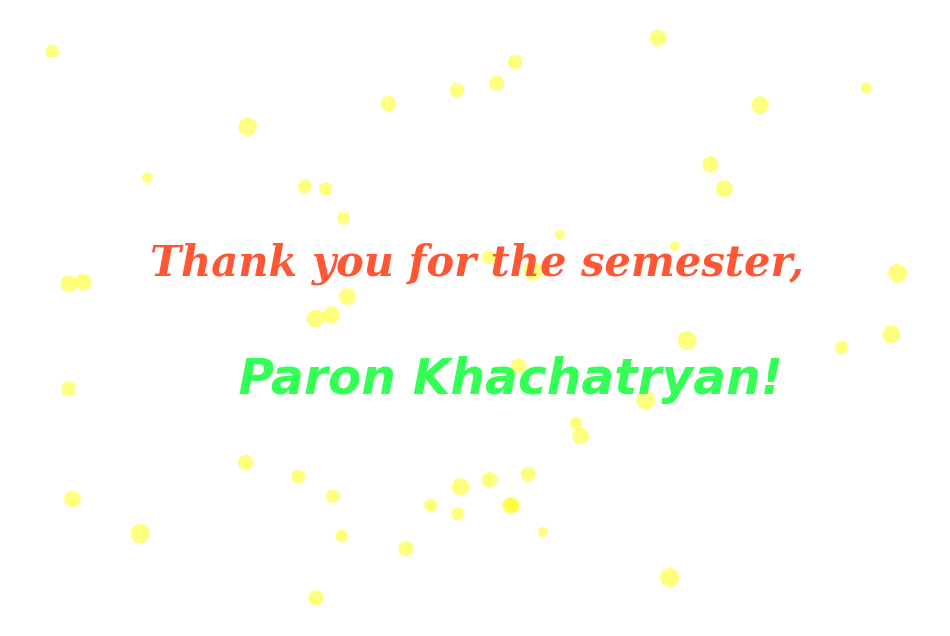

In [52]:
import matplotlib.pyplot as plt
import numpy as np

def plot_thank_you_message():
    message = """
    Thank you for the semester,
    Paron Khachatryan!
    """

    fig, ax = plt.subplots(figsize=(12, 8))

    ax.axis('off')

    colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#A133FF']
    fonts = ['serif', 'sans-serif', 'cursive', 'fantasy', 'monospace']

    lines = message.strip().split('\n')

    for i, line in enumerate(lines):
        ax.text(0.5, 0.6 - i * 0.2, line, ha='center', va='center', fontsize=30 + i * 5, color=colors[i % len(colors)], fontname=fonts[i % len(fonts)], fontweight='bold', style='italic')

    num_stars = 50
    x_stars = np.random.rand(num_stars)
    y_stars = np.random.rand(num_stars)
    s_stars = np.random.randint(50, 200, num_stars)
    ax.scatter(x_stars, y_stars, s=s_stars, color='yellow', alpha=0.5, edgecolors='none')

    plt.show()

if __name__ == "__main__":
    plot_thank_you_message()

